# FIZA GAFOOR M

## SALES PREDICTION

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Reading the dataset

In [2]:
df = pd.read_csv(r"D:\DUK\INTERNSHIPS\OASIS-Infobyte\task5\Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### Basic information about the data

In [4]:
df.head()   # Displays the first 5 entries

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()   # Displays the last 5 entries

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.shape   # Displays the number of rows and columns in the dataset

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()   # Basic statistical information about the data

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.columns   # Lists out all the columns in the dataset

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
df.isna().sum()   # Get the number of null or missing values in the data

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [11]:
df.duplicated().sum()   # Get the total number of duplicated entries in the data

0

There are no null values or duplicated entries in the data

### Drop irrelevant columns, if any

In [12]:
df.drop('Unnamed: 0', axis=1, inplace=True)

Since the column 'Id' is not relevant to the task at hand, it is dropped from the dataframe.

In [13]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [14]:
att=list(df.columns.drop(['Sales']))
target=['Sales']

The data is split into two - attributes and target

### Removing outliers

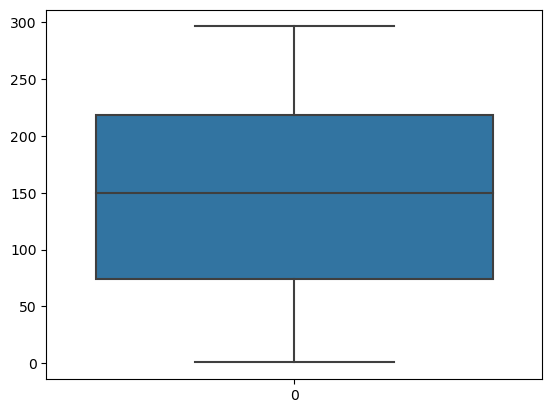

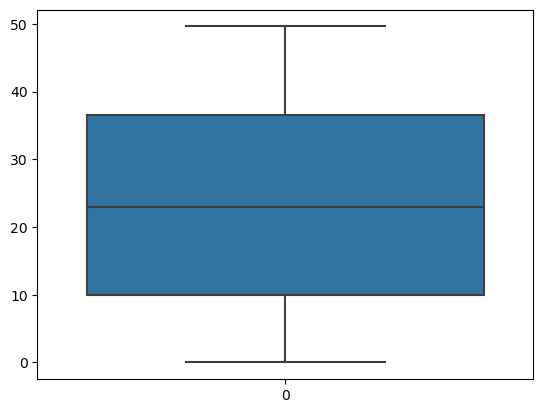

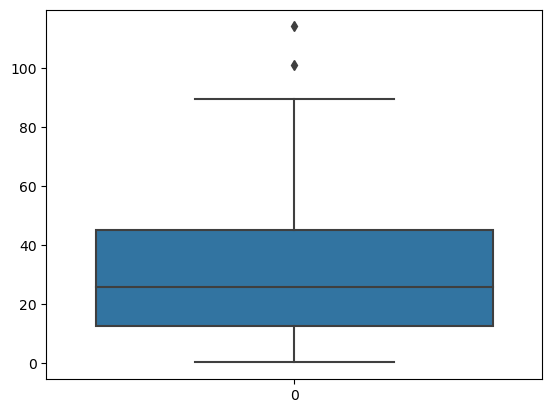

In [15]:
for i in att:
    sns.boxplot(data=df[i])
    plt.show()

In [16]:
for i in att:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)

    IQR = Q3-Q1
    low = Q1-1.5*IQR
    up = Q3+1.5*IQR

    for j in df[i]:
        if j<low:
            df=df.replace(j, low)
        if j>up:
            df=df.replace(j, up)

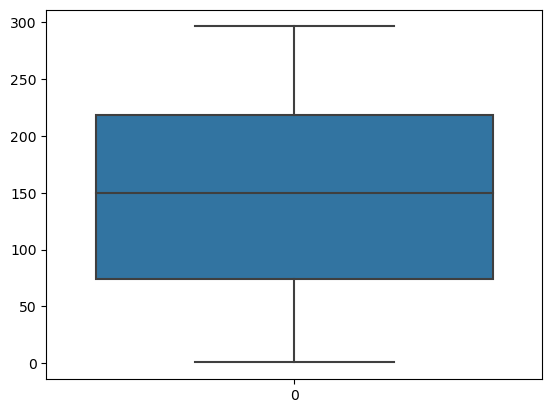

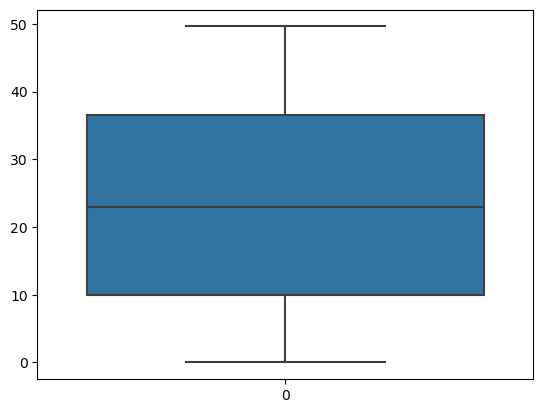

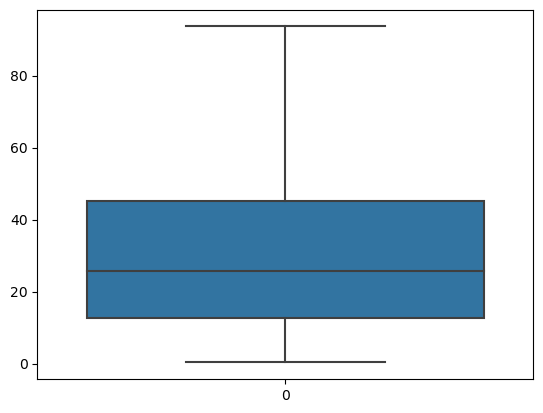

In [17]:
for i in att:
    sns.boxplot(data=df[i])
    plt.show()

### Data Visualization

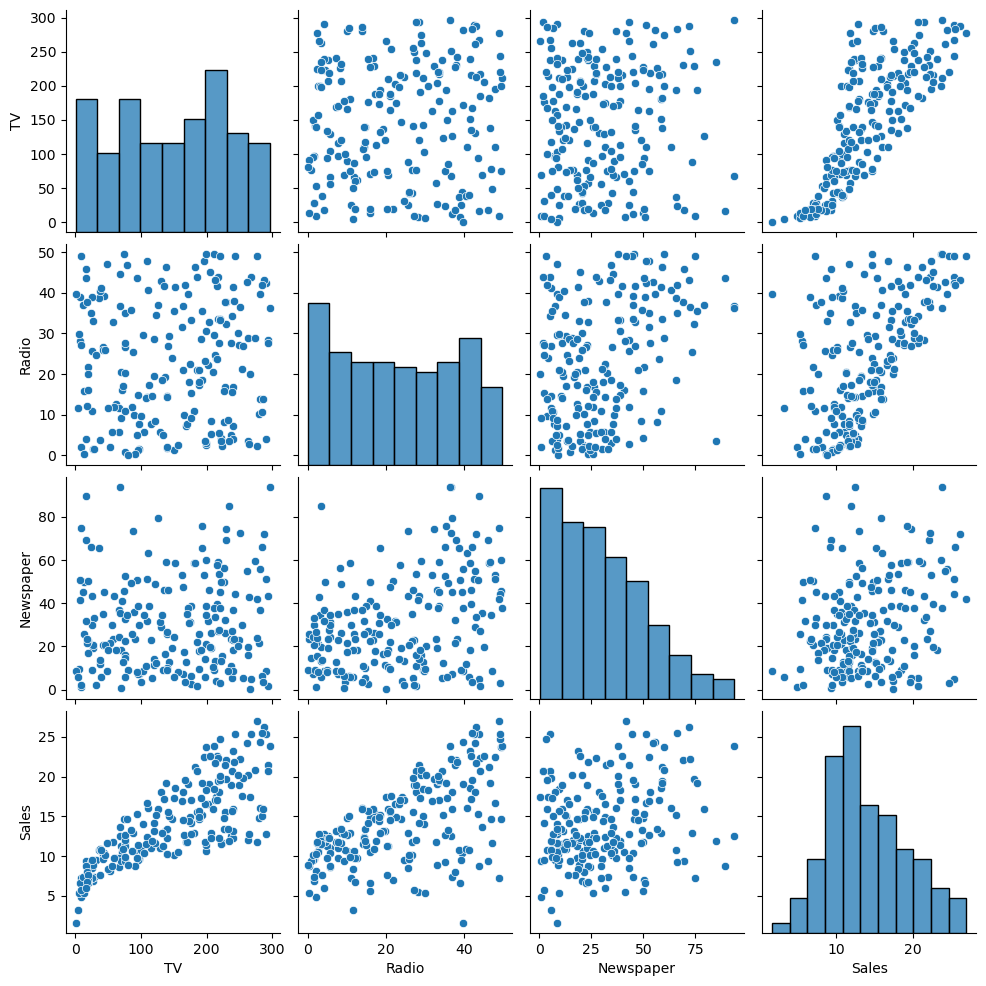

In [18]:
sns.pairplot(data=df)
plt.show()

A pairplot gives a pictorial representation of the entire dataset by plotting graphs between all columns. It shows how every column is related to the other.

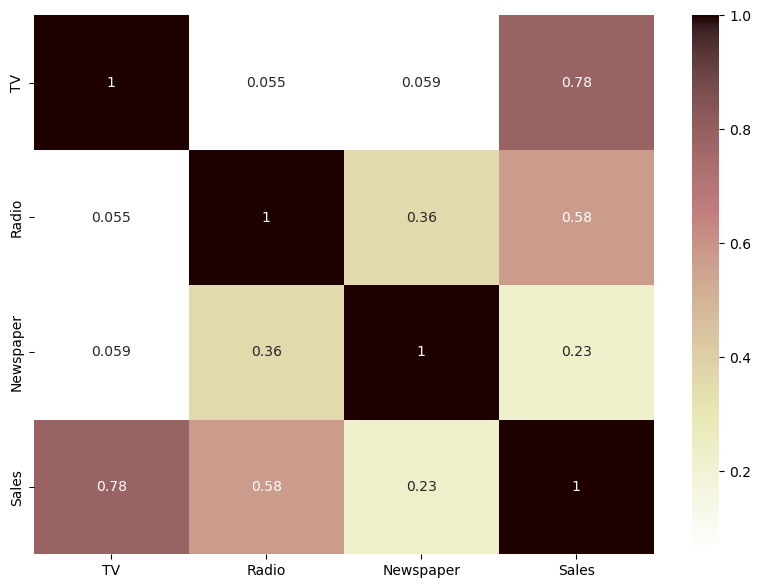

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(data=df.corr(), annot=True, cmap='pink_r')
plt.show()

The heatmap shows the correlation between each pair of attributes.
* TV and Sales have a highly positive correlation, i.e. when one increases in value, so does the other.
* TV also has very little correlation with both Radio and Newspaper, i.e. when Radio and Newspaper increase, it affects TV but not significantly.

### Model building

In [20]:
# Splitting the dataset

from sklearn.model_selection import train_test_split

x = df.drop(['Sales'], axis=1)
y = df['Sales']

X_test, X_train, y_test, y_train = train_test_split(x,y,random_state=42, test_size=0.25)


In [21]:
X_train.shape, y_train.shape

((50, 3), (50,))

In [22]:
X_test.shape, y_test.shape

((150, 3), (150,))

In [23]:
# Building and fitting the model

from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

### Evaluating the performance of the model

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

print('Training Accuracy: ', model.score(X_train, y_train))
print('-----------------------------------------------------')
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print('-----------------------------------------------------')
print("R-squared:", r2_score(y_test, y_pred))

Training Accuracy:  0.9006016081032304
-----------------------------------------------------
Mean Squared Error: 2.976527576726711
-----------------------------------------------------
R-squared: 0.8888538854168322


* The model has a training accuracy of 90.06%
* It also has an R-squared value of 0.888. This means that 88.8% of the variability observed in the target variable is explained by the regression model.